# Team Tyrell - Decade Predictor
This explores various ML classifier methods to predict music genre a given song/track.  
-Uses SKLearn's Random Forest Classifier and evaluates accuracy and results  
-Also considers a K Nearest Neighbor model  
-Exports the RF model and the scaler for use in other app  
-Provides an internal app that provides a pulldown for data predictions from the train/test dataset  
-Provides Spotify API connectivy to pull feature information for any song in Spotify  
-Provides an internal app to predict genre for any song 
***

In [37]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
import seaborn as sns

import joblib


In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
musicData = pd.read_csv("Resources/music.csv")

#define the genreIndex
genreIndex=['Acoustic/Folk', 
           'Blues',
           'Bollywood',
           'Country',
           'HipHop',
           'Indie Alt',
           'Instrumental',
           'Metal',
           'Pop',
           'Rock']

musicData

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [3]:
# Drop non-contributing ID columns
musicDF = musicData.drop(columns=['Artist Name', 'Track Name'])


# Optional: Change Artist Name and Track Name to string
#cat_col = ['Artist Name','Track Name']

#for i in cat_col:
#    data[i] = data[i].astype('str') 


# musicDF

In [4]:
# Count the number of NaN values in each column
nan_counts = musicDF.isna().sum()
nan_counts

Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [5]:
# Count the number of rows with at least one NaN value
rows_with_nan = musicDF.isna().any(axis=1).sum()
# rows_with_nan

In [6]:
# Option1: Drop instrumentalness for now since there are many NaN's- try to figure out how to populate NaN's later?  
# musicDF = musicDF.drop(columns=['Popularity', 'key', 'instrumentalness'])

In [7]:
# Option2: drop samples with NaN values
#musicDF = musicDF.dropna()

In [8]:
# Option3: imput missing with zero
musicDF = musicDF.fillna(0)

In [9]:
# musicDF.shape

In [10]:
# the Random Forest Confusion Matrix showed that the classifier had a hard time predicted the difference between "Alt_Music_1" and "Indie Alt_6".  Combining them into "Indie Alt_6"
# Replace values in 'Class' column
musicDF['Class'] = musicDF['Class'].replace(1, 6)

### Split Data Into Features and our Label (genre)

In [11]:
# Separate the data into labels (Class = genre) and features/attributes

# Separate the y variable, the labels
y = musicDF["Class"].values


# Separate the X variable, the features
X = musicDF.drop("Class", axis=1).values

In [12]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

#### Scale Data

In [13]:
# import the StandardScaler and scale the data
from sklearn.preprocessing import StandardScaler

# make the instance of the standard scaler
scaler = StandardScaler()

# fit the scaler onto the data
X_scaler = scaler.fit(X_train)

# scale the x train and test using .transform function
xTrainScaled = X_scaler.transform(X_train)
xTestScaled = X_scaler.transform(X_test)

### First Try Random Forest Classifier to Create Model

In [14]:
# import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# create the random forest classifier model
rfModel = RandomForestClassifier(n_estimators=500, random_state=80)

# fit the model onto our scaled X training data and the trained y data
rfModel = rfModel.fit(xTrainScaled, y_train)

In [15]:
# make the predictions using the testing data
predictedValues = rfModel.predict(xTestScaled)

#### Determine Accuracy

In [16]:
# import the modules for the confusion matrix, accuracy score, and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
# calculate the accuracy score
accuracyScore = accuracy_score(y_test, predictedValues)
print(f"Random Forest Classifier Accuracy Score: {(accuracyScore*100):.2f}%")

Random Forest Classifier Accuracy Score: 56.66%


In [18]:
# rf confusion matrix; Predicted is columns, Actuals are rows
rfConfusionData = confusion_matrix(y_test, predictedValues)

rfConfusionDF = pd.DataFrame(
    rfConfusionData,
    index=genreIndex,
    columns=genreIndex
)
rfConfusionDF

,Acoustic/Folk,Blues,Bollywood,Country,HipHop,Indie Alt,Instrumental,Metal,Pop,Rock
Acoustic/Folk,127,0,8,9,0,0,0,0,10,2
Blues,0,103,0,0,6,71,0,3,24,111
Bollywood,16,0,77,5,0,0,2,0,0,0
Country,19,0,3,64,0,0,0,0,8,3
HipHop,0,5,0,0,254,28,0,0,50,25
Indie Alt,0,10,0,0,26,524,0,26,69,335
Instrumental,9,0,6,0,0,0,129,0,0,0
Metal,0,0,0,0,0,29,0,235,2,198
Pop,7,7,0,7,66,95,0,0,316,133
Rock,4,41,2,12,12,225,0,127,94,720


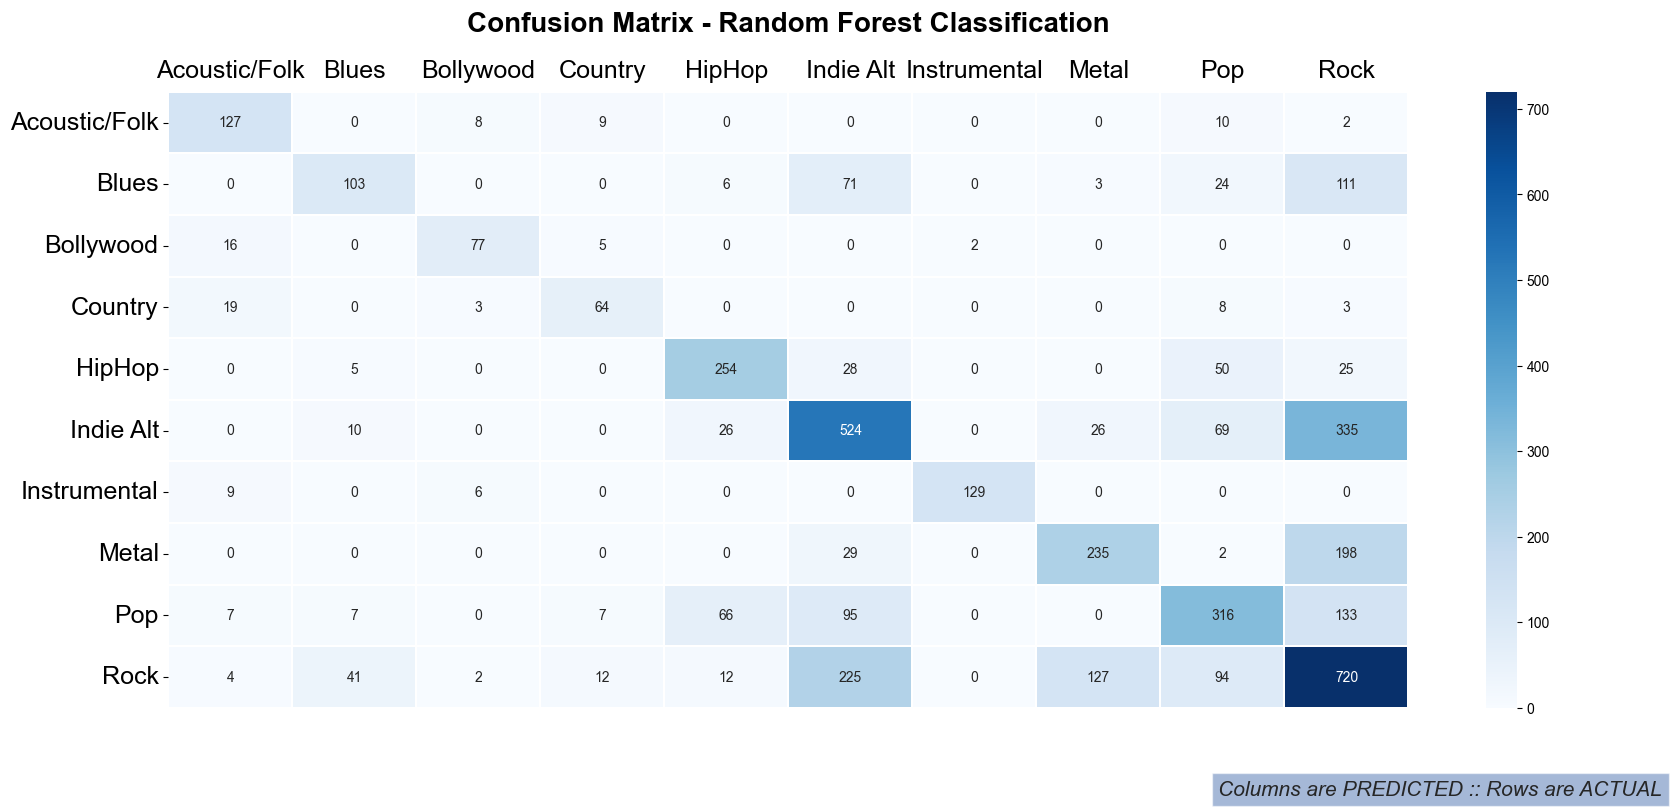

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot heatmap for confusion matrix
plt.figure(figsize=(20,8))  
plt.title(f"Confusion Matrix - Random Forest Classification", fontsize=20, weight = 'bold', pad=20)

sns.heatmap(rfConfusionDF, cmap ='Blues', linewidths = 0.30, annot = True, fmt='.0f')
sns.set(font_scale=1.2)
plt.tick_params(axis='both', which='major', labelsize=18, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.figtext(.65, 0.001, "Columns are PREDICTED :: Rows are ACTUAL", fontsize=15, style = 'italic', bbox={"alpha":0.5, "pad":5})

plt.show()
plt.tight_layout()

In [20]:
# classification report
print(classification_report(y_test, predictedValues, target_names = genreIndex))

               precision    recall  f1-score   support

Acoustic/Folk       0.70      0.81      0.75       156
        Blues       0.62      0.32      0.43       318
    Bollywood       0.80      0.77      0.79       100
      Country       0.66      0.66      0.66        97
       HipHop       0.70      0.70      0.70       362
    Indie Alt       0.54      0.53      0.53       990
 Instrumental       0.98      0.90      0.94       144
        Metal       0.60      0.51      0.55       464
          Pop       0.55      0.50      0.52       631
         Rock       0.47      0.58      0.52      1237

     accuracy                           0.57      4499
    macro avg       0.66      0.63      0.64      4499
 weighted avg       0.58      0.57      0.57      4499



In [21]:
# calculate feature importance 
importantFeatures = rfModel.feature_importances_
featureNames = musicDF.drop("Class", axis=1).columns

# sort the features by their importance, zip them, and display them
zippedFeatures = sorted(zip(importantFeatures, featureNames), reverse=True)
importantFeaturesDF = pd.DataFrame(zippedFeatures)
importantFeaturesDF.set_index(importantFeaturesDF[1], inplace=True)
importantFeaturesDF.drop(columns=1, inplace=True)
importantFeaturesDF.rename(columns={0: 'Feature Importances'}, inplace=True)
# importantFeaturesDF

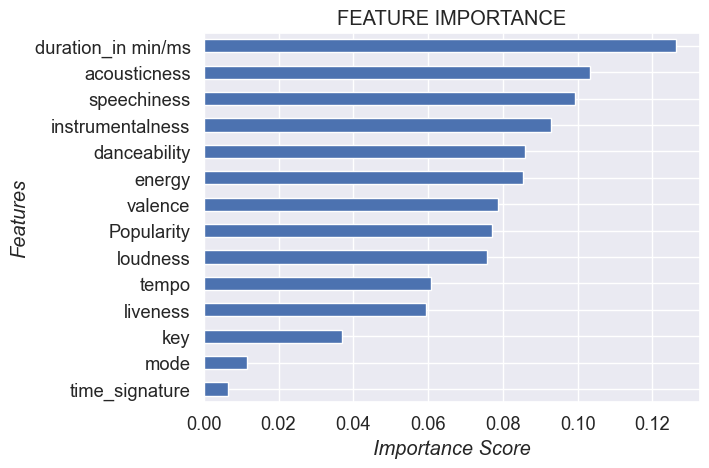

In [22]:
# Plot feature importances as horizontal bar chart
importantFeaturesDFSorted = importantFeaturesDF.sort_values(by="Feature Importances")

fig, ax = plt.subplots()
importantFeaturesDFSorted.plot.barh(ax=ax, legend=False)
ax.set_title('FEATURE IMPORTANCE')
ax.set_xlabel('Importance Score', fontstyle='italic')
ax.set_ylabel('Features', fontstyle='italic')
plt.show()

### Try a Logistic Regression Model with the Original Data

In [23]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifierModel = LogisticRegression(solver='lbfgs', random_state=1)
classifierModel

LogisticRegression(random_state=1)

In [24]:
# Fit the model using training data
classifierModel.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [25]:
# validate the model using the test data - use .score() function to get the accuracy
model_score_train = classifierModel.score(X_train, y_train)
print("Model Score (Accuracy) - Trained Data:", model_score_train)

Model Score (Accuracy) - Trained Data: 0.2926576276209528


In [26]:
model_score_test = classifierModel.score(X_test, y_test)
print("Logistic Regression Model Score (Accuracy):", model_score_test)

Logistic Regression Model Score (Accuracy): 0.29984440986885974


### Try K Nearest Neighbor (KNN) Classifyier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(xTrainScaled, y_train)


KNeighborsClassifier(n_neighbors=10)

In [28]:
predictedValues = knn.predict(xTestScaled)

In [29]:
# calculate the accuracy score
accuracyScore = accuracy_score(y_test, predictedValues)
print(f"KNN Model Accuracy Score: {(accuracyScore*100):.2f}%")

KNN Model Accuracy Score: 48.08%


### Export the Model and Scaler

In [30]:
joblib.dump(rfModel, 'rfModel_genre.joblib')
joblib.dump(scaler, 'scaler_genre.joblib')

['scaler_genre.joblib']

## GENRE PREDICTOR

In [31]:
from ipywidgets import interact, Dropdown

# Fill in nan's with 0
musicData = musicData.fillna(0)

# select the trained and tested model to use: rfModel or knn; this could be made a dropdown as well
modelType = rfModel

# Create the dropdown options with Track Name and Artist Name
dropdown_options = [(f"{track} - {artist}", track) for track, artist in zip(musicData['Track Name'], musicData['Artist Name'])]
dropdown = Dropdown(options=dropdown_options)

# Define a function to handle the dropdown value change
def on_dropdown_change(change):
    # Retrieve the selected value from the dropdown
    selected_track = change.new
    
    # Update the 'sample_track_name' variable with the selected value
    sample_track_name = selected_track
    
    # Continue with the rest of the code
    sample_data = musicData[musicData['Track Name'] == sample_track_name].values
    sample_artist_name = sample_data[0, 0]
    sample_actual_genre = sample_artist_name = sample_data[0, 16]
    sample_data = sample_data[:, 2:-1]
    sample_data_scaled = scaler.transform(sample_data)  # Preprocess the sample data using the scaler

    # Make the prediction
    prediction = modelType.predict(sample_data_scaled)

    # Convert prediction output to Genre
    genre_label = {
        0: 'Acoustic/Folk',
        1: 'Alt_Music',
        2: 'Blues',
        3: 'Bollywood',
        4: 'Country',
        5: 'HipHop',
        6: 'Indie Alt',
        7: 'Instrumental',
        8: 'Metal',
        9: 'Pop',
        10: 'Rock'
    }

    predicted_genre = genre_label[prediction[0]]
    actual_genre = genre_label[sample_actual_genre]  

    print(f"Predicted genre for the sample '{sample_track_name}': {predicted_genre}")
    print(f"Actual genre for the sample '{sample_track_name}': {actual_genre}")

# Register the function to handle the dropdown value change event
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown
display(dropdown)

Dropdown(options=(("That's What I Like (feat. Gucci Mane) - Bruno Mars", "That's What I Like (feat. Gucci Mane…

## SPOTIFY GENRE CLASSIFIER

In [32]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import ipywidgets as widgets
from IPython.display import display

In [33]:
# Set up your Spotify API credentials
client_id = '7f37bb631ed34cf29a487f88d5c5e32f'
client_secret = 'aff5f020a49b470f99d7a3c251f5b649'

# Authenticate with the Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Define a function to get track audio features
def get_track_audio_features(artist_name, track_name):
    # Search for the track
    results = sp.search(q=f"artist:{artist_name} track:{track_name}", type='track')

    # Check if the search results contain any tracks
    if len(results['tracks']['items']) == 0:
        print(f"No track found for '{artist_name} - {track_name}'")
        return None

    # Get the first track from the search results
    track = results['tracks']['items'][0]

    # Get the track's ID
    track_id = track['id']

    # Get audio features for the track
    audio_features = sp.audio_features(track_id)

    # Extract desired features
    track_features = {}
#    track_features['Artist'] = artist_name
#    track_features['Track'] = track_name
    track_features['Popularity'] = track['popularity']
    track_features['Danceability'] = audio_features[0]['danceability']
    track_features['Energy'] = audio_features[0]['energy']
    track_features['Key'] = audio_features[0]['key']
    track_features['Loudness'] = audio_features[0]['loudness']
    track_features['Mode'] = audio_features[0]['mode']
    track_features['Speechiness'] = audio_features[0]['speechiness']
    track_features['Acousticness'] = audio_features[0]['acousticness']
    track_features['Instrumentalness'] = audio_features[0]['instrumentalness']
    track_features['Liveness'] = audio_features[0]['liveness']
    track_features['Valence'] = audio_features[0]['valence']
    track_features['Tempo'] = audio_features[0]['tempo']
    track_features['Duration (ms)'] = audio_features[0]['duration_ms']
    track_features['Time Signature'] = audio_features[0]['time_signature']

    return track_features


In [34]:
def predict_genre(feature_array): 
    feature_array = np.array(feature_array).reshape(1, -1)
    spotify_track_scaled = scaler.transform(feature_array)  # Preprocess the sample data using the scaler

    # Make the prediction
    prediction = modelType.predict(spotify_track_scaled)

    # Convert prediction output to Genre
    genre_label = {
        0: 'Acoustic/Folk',
        1: 'Alt_Music',
        2: 'Blues',
        3: 'Bollywood',
        4: 'Country',
        5: 'HipHop',
        6: 'Indie Alt',
        7: 'Instrumental',
        8: 'Metal',
        9: 'Pop',
        10: 'Rock'
    }

    predicted_genre = genre_label[prediction[0]]
    
    return predicted_genre



In [35]:
def show_track_prediction(track_name, artist_name):
    # Get the user input
    #track_name = track_name_widget.value
    #artist_name = artist_name_widget.value

    # Print the user input
    print(f"Track Name: {track_name}")
    print(f"Artist Name: {artist_name}")

    track_features = get_track_audio_features(artist_name, track_name)

    # Check if track features are available
    if track_features is not None:

        # Convert the dictionary to an array
        feature_array = [track_features[key] for key in track_features]

        # Print the feature array
        #print(feature_array)

        predicted_genre = predict_genre(feature_array)
    
        return predicted_genre

#        print(f"Predicted genre for '{track_name}' by {artist_name}: {predicted_genre}")

In [42]:
# Create text input widgets
track_name_widget = widgets.Text(description='Track Name:')
artist_name_widget = widgets.Text(description='Artist Name:')

# Create button widget
button = widgets.Button(description='Get Genre')

output = widgets.Output()

# Define function to handle button click event
def on_button_click(b):
    track_name = track_name_widget.value
    artist_name = artist_name_widget.value
    predicted_genre = show_track_prediction(track_name, artist_name)
    
    with output:
        clear_output(wait=True) 
    
        print(f"Predicted genre for '{track_name}' by {artist_name}: {predicted_genre}")

# Attach button click event handler
button.on_click(on_button_click)

# Display the widgets
#info = Markdown("""# SPOTIFY DECADE PREDICTOR""")
makeDisplay = widgets.VBox([track_name_widget, artist_name_widget,  button, output])
display(makeDisplay)

Track Name: Jolene
Artist Name: Dolly Parton
